In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# from sklearn.


df = pd.read_csv('./mushrooms.csv')
# df.info()
# df.describe()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

for feature in df.columns:
    df[feature] = labelEncoder.fit_transform(df[feature])

# labelEncoder.fit(df['cap-shape'])
# labelEncoder.classes_
# labelEncoder.transform(df['cap-shape'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1])

In [14]:
p = []
e = []

for shape in df['cap-shape'].unique():
    p.append(len(df[df['cap-shape'] == shape][df['class'] == 1]))
    e.append(len(df[df['cap-shape'] == shape][df['class'] == 0]))
p

/Users/maxim.romaniv/PycharmProjects/test/data-science-course/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/maxim.romaniv/PycharmProjects/test/data-science-course/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[1708, 48, 0, 1556, 600, 4]

<BarContainer object of 6 artists>

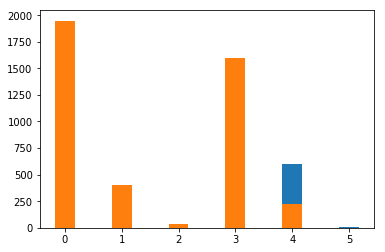

In [15]:
fig, ax = plt.subplots()

ax.bar(sorted(df['cap-shape'].unique()), p, 0.35)
ax.bar(sorted(df['cap-shape'].unique()), e, 0.35)

/Users/maxim.romaniv/PycharmProjects/test/data-science-course/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/maxim.romaniv/PycharmProjects/test/data-science-course/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<BarContainer object of 9 artists>

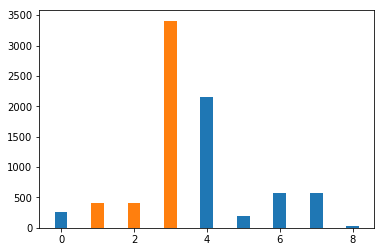

In [16]:
p = []
e = []

for shape in df['odor'].unique():
    p.append(len(df[df['odor'] == shape][df['class'] == 1]))
    e.append(len(df[df['odor'] == shape][df['class'] == 0]))

fig, ax = plt.subplots()

ax.bar(sorted(df['odor'].unique()), p, 0.35)
ax.bar(sorted(df['odor'].unique()), e, 0.35)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

data = df.drop('class', axis=1).values
target = df['class'].values
kn = KNeighborsClassifier(n_neighbors=1)


from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
def get_precision(data, model):
    errors = 0
    for tr, ts in loo.split(data):
        model.fit(data[tr], target[tr])
        errors += sum(target[ts] != model.predict(data[ts]))


    quality = (1 - errors/len(data))*100
    return quality

        
# get_precision(data, kn)

In [20]:
!pip install sklearn

# from sklearn.tree import DecisionTree

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


ImportError: cannot import name 'DecisionTree'